In [1]:
%load_ext sql
#Used to load sql extension

In [2]:
%sql sqlite:///sqlite-dvdrental.db
#This loads the Database in the Jupyter Notebook

In [3]:
import sqlalchemy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
%%sql

SELECT *
FROM film
LIMIT 1

 * sqlite:///sqlite-dvdrental.db
Done.


film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00


In [5]:
con = sqlalchemy.create_engine("sqlite:///sqlite-dvdrental.db")

In [6]:
# 1. Write a SQL Query that gives for each customer the average rental duration and the number of rentals
avg_rental = pd.read_sql("""
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    COUNT(r.rental_id) AS rental_count,
    AVG(julianday(r.return_date) - julianday(r.rental_date)) AS average_duration
FROM
    customer c
LEFT JOIN
    rental r ON c.customer_id = r.customer_id
GROUP BY
    c.customer_id, c.first_name, c.last_name
ORDER BY
    c.customer_id
""", con)
#pd.read_sql = pandas function used to execute SQL query and fetch the data
#("""") = This is where you type your SQL query
#Con is the database connection which we defined earlier

In [7]:
avg_rental

,customer_id,first_name,last_name,rental_count,average_duration
0,1,MARY,SMITH,32,4.470920
1,2,PATRICIA,JOHNSON,27,5.525077
2,3,LINDA,WILLIAMS,26,5.888488
3,4,BARBARA,JONES,22,3.945202
4,5,ELIZABETH,BROWN,38,5.069595
...,...,...,...,...,...
594,595,TERRENCE,GUNDERSON,30,4.936412
595,596,ENRIQUE,FORSYTHE,28,4.692078
596,597,FREDDIE,DUGGAN,25,4.674942
597,598,WADE,DELVALLE,22,5.825789


<Axes: xlabel='rental_count', ylabel='average_duration'>

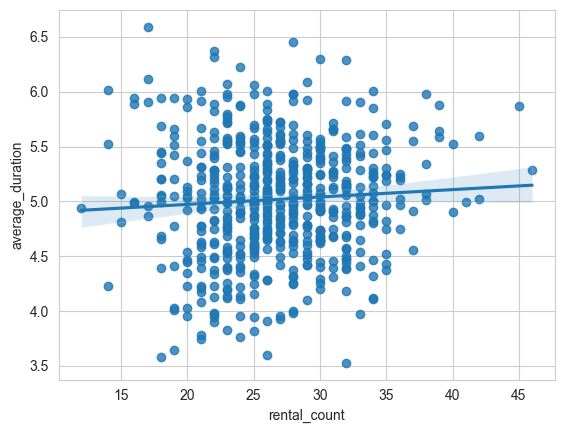

In [8]:
# 2. Load the data from your SQL query into a Python Pandas DataFrame. Create a Seaborn regression plot, which is a scatterplot with a regression line
sns.set_style("whitegrid")
sns.regplot(x='rental_count', y='average_duration', data=avg_rental)
#Rental_count and average rental duration are positively correlated 

In [9]:
# 3, 5, 7. Adding of mathematical formulas through LaTeXX equation

$$\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_{i}$$
$$\text{Variance (\(\sigma^2\)):}\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2$$
$$\text{Standard Deviation (\(\sigma\)):}\sigma = \sqrt{\sigma^2}$$
$$\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$
$$\rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}$$


In [10]:
# 4. Calculate the mean for average rental duration and the number of rentals in Pandas
#Above is the formula for the mean, varriance and standard deviaton --> we used LaTeX equation in a Markdown cell to render the formula

mean_average_rental_duration = avg_rental['average_duration'].mean()

mean_rental_count = avg_rental['rental_count'].mean()

print("Mean Average Rental Duration", mean_average_rental_duration)

print('Mean Rental Count', mean_rental_count)


Mean Average Rental Duration 5.018504065141673
Mean Rental Count 26.784641068447414


In [11]:
# 6. Calculate the variance and standard deviations for the average rental duration an the number of retals in Pandas
variance_duration = avg_rental['average_duration'].var()
std_duration = avg_rental['average_duration'].std()
variance_rental = avg_rental['rental_count'].var()
std_rental = avg_rental['rental_count'].std()

print('variance average rental duration', variance_duration)
print('std average rental duration', std_duration)
print('variance rental count', variance_rental)
print('std rental count', std_rental)
# rental duration has small variance & small std -->data points tend to cluster arround the mean
# number of rentals data points are more spread out from the mean, resulting in a higher variance and std -->
# --> more variability in the number of rentals among customers


variance average rental duration 0.2770518427734295
std average rental duration 0.526357143746933
variance rental count 26.115750330818926
std rental count 5.110357162744981


In [12]:
# 8. Calculate in Pandas the covariance between the average rental duration and the number of rentals

covariance = avg_rental['average_duration'].cov(avg_rental['rental_count'])
print(covariance)
# indication for weak positive relationshop between average duration and rental count
# However, it's important to note that covariance doesn't provide a standardized measure of the strength or direction of the relationship.
# To better understand the strength and direction, you might want to calculate the correlation coefficient (Pearson's correlation coefficient), 
# which ranges between -1 and 1. A positive correlation coefficient would confirm a positive relationship, and its magnitude would indicate
#  the strength of that relationship.

0.176111404956361


In [13]:
# 9. Calculate the Pearson's correlation coefficient in Pandas between average rental duration and number of rentals
correlation_coefficient = avg_rental['average_duration'].corr(avg_rental['rental_count'])
print(correlation_coefficient)

0.06547201484062815


In [14]:
# 10 Use Pingouin to calculate Pearson's correlation between average rental duration and number of rentals
# 11 Add a markdown cell an describe the meaning of the p-value. What would you recommend to the CEO?
import pingouin as pg
pingu_corr = pg.corr(avg_rental['average_duration'], avg_rental['rental_count'], method = 'pearson')
print(pingu_corr)
# n = samle size
# r = Pearson correlation coefficient
# CI95% = 95% confidence interval for the correlation coefficient

           n         r          CI95%     p-val   BF10     power
pearson  599  0.065472  [-0.01, 0.14]  0.109429  0.184  0.360284


 The p-value, short for "probability value," is a crucial concept in statistics, particularly in hypothesis testing. It represents the probability of observing a test statistic (or something more extreme) if the null hypothesis is true. In simpler terms, it tells you how likely it is to obtain the observed results purely by chance.

In hypothesis testing, you start with a null hypothesis (H0), which is a statement of no effect or no difference, and an alternative hypothesis (H1), which is what you want to test. The p-value helps you decide whether you should reject the null hypothesis or not.

If p-value ≤ α (the chosen significance level, often 0.05): You have evidence to reject the null hypothesis. This suggests that your results are statistically significant, and you can conclude that there is an effect or a difference.

If p-value > α: You do not have enough evidence to reject the null hypothesis. This suggests that your results could have occurred by random chance, and you do not have statistical significance.

In summary, the p-value is an essential tool for assessing the significance of statistical results. In this specific case, it suggests that more investigation or data might be needed before making significant decisions based on the correlation observed.


Recommendation for CEO:
Because the p-val is greater than our significance lvl (0.05), it suggests that our results could've occured by random chance and there is no statistical significance 
--> because of the lack of statistical significance, I'd recommend caution in drawing strong conclusions based solely on this correlation